In [0]:
from google.colab import drive
drive.mount('/content/gdrive')


Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [0]:

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
import numpy as np


path ="/content/gdrive/My Drive/google_trainset.csv"
df= pd.read_csv(path)


In [0]:

train_data = df.iloc[:,1:2]
train_data2=train_data
train_data1=train_data
train_data

,Open
0,357.385559
1,360.122742
2,362.313507
3,365.348755
4,365.393463
5,363.769043
6,369.014923
7,368.602600
8,366.118744
9,357.340851


In [0]:
train_data.shape

(1259, 1)

In [0]:
#converting into array
train_data= df.iloc[:,1:2].values
train_data

array([[ 357.385559],
       [ 360.122742],
       [ 362.313507],
       ...,
       [1057.390015],
       [1051.599976],
       [1046.719971]])

In [0]:
#applying feauture scaling 
sc = MinMaxScaler()

train_data = sc.fit_transform(train_data)

In [0]:
train_data


array([[0.01011148],
       [0.01388614],
       [0.01690727],
       ...,
       [0.97543954],
       [0.9674549 ],
       [0.96072522]])

In [0]:
X_train_data = train_data[0:1257]
Y_train_data = train_data[1:1258]
X_train_data[0]

array([0.01011148])

In [0]:
X_train_data= np.reshape(X_train_data, (1257, 1, 1))
#list conversion not possible
X_train_data[0:2]

array([[[0.01011148]],

       [[0.01388614]]])

In [0]:
regressor = Sequential()
#rnn model
regressor.add(LSTM(units=10,activation='tanh',input_shape=(None,1)))
regressor.add(Dense(units=1))
#used adam optimizer...  check for other
regressor.compile(optimizer='adam' ,loss='mean_squared_error')

In [0]:
#training   data
bs=30
calls=50
regressor.fit(X_train_data,Y_train_data, batch_size = bs, epochs = calls)

Epoch 1/50
1257/1257 [==============================] - 2s 2ms/sample - loss: 0.1528
Epoch 2/50
1257/1257 [==============================] - 0s 77us/sample - loss: 0.0816
Epoch 3/50
1257/1257 [==============================] - 0s 78us/sample - loss: 0.0401
Epoch 4/50
1257/1257 [==============================] - 0s 79us/sample - loss: 0.0245
Epoch 5/50
1257/1257 [==============================] - 0s 82us/sample - loss: 0.0202
Epoch 6/50
1257/1257 [==============================] - 0s 81us/sample - loss: 0.0176
Epoch 7/50
1257/1257 [==============================] - 0s 78us/sample - loss: 0.0151
Epoch 8/50
1257/1257 [==============================] - 0s 78us/sample - loss: 0.0127
Epoch 9/50
1257/1257 [==============================] - 0s 84us/sample - loss: 0.0104
Epoch 10/50
1257/1257 [==============================] - 0s 77us/sample - loss: 0.0082
Epoch 11/50
1257/1257 [==============================] - 0s 80us/sample - loss: 0.0063
Epoch 12/50
1257/1257 [==============================

In [0]:
path2 ="/content/gdrive/My Drive/google_testset.csv"
df2= pd.read_csv(path2)
df2.iloc[:,1:2].values
#array conversion
test_data = df2.iloc[:,1:2].values

test_data

array([[1048.339966],
       [1064.310059],
       [1088.      ],
       [1094.      ],
       [1102.22998 ],
       [1109.400024],
       [1097.099976],
       [1106.300049],
       [1102.410034],
       [1132.51001 ],
       [1126.219971],
       [1131.410034],
       [1131.829956],
       [1137.48999 ],
       [1159.849976],
       [1177.329956],
       [1172.530029],
       [1175.079956],
       [1176.47998 ],
       [1167.829956],
       [1170.569946],
       [1162.609985],
       [1122.      ],
       [1090.599976],
       [1027.180054],
       [1081.540039],
       [1055.410034],
       [1017.25    ],
       [1048.      ],
       [1045.      ],
       [1048.949951],
       [1079.069946],
       [1088.410034],
       [1090.569946],
       [1106.469971],
       [1116.189941],
       [1112.640015],
       [1127.800049],
       [1141.23999 ],
       [1123.030029],
       [1107.869995],
       [1053.079956],
       [1075.140015],
       [1099.219971],
       [1089.189941],
       [11

In [0]:
#adjusting test data in model
input_layer = test_data
input_layer=(input_layer)
input_layer= sc.transform(input_layer)
input_layer=np.reshape(input_layer,(125, 1, 1))
predicted = regressor.predict(input_layer)
predicted = sc.inverse_transform(predicted)
predicted

array([[1066.357  ],
       [1084.0581 ],
       [1110.3707 ],
       [1117.0443 ],
       [1126.2036 ],
       [1134.1884 ],
       [1120.4935 ],
       [1130.7356 ],
       [1126.404  ],
       [1159.9523 ],
       [1152.9359 ],
       [1158.7251 ],
       [1159.1936 ],
       [1165.5092 ],
       [1190.4775 ],
       [1210.0138 ],
       [1204.648  ],
       [1207.4984 ],
       [1209.0635 ],
       [1199.3948 ],
       [1202.457  ],
       [1193.5615 ],
       [1148.2303 ],
       [1113.2621 ],
       [1042.9557 ],
       [1103.1895 ],
       [1074.1895 ],
       [1031.9962 ],
       [1065.9807 ],
       [1062.6593 ],
       [1067.0326 ],
       [1100.445  ],
       [1110.8265 ],
       [1113.2286 ],
       [1130.9249 ],
       [1141.7538 ],
       [1137.7979 ],
       [1154.6982 ],
       [1169.6946 ],
       [1149.3788 ],
       [1132.4841 ],
       [1071.6075 ],
       [1096.0793 ],
       [1122.8529 ],
       [1111.6938 ],
       [1140.7842 ],
       [1163.8464 ],
       [1194.

In [0]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2013-01-02,357.385559,361.151062,355.959839,359.288177,359.288177,5115500
1,2013-01-03,360.122742,363.600128,358.031342,359.496826,359.496826,4666500
2,2013-01-04,362.313507,368.339294,361.488861,366.600616,366.600616,5562800
3,2013-01-07,365.348755,367.301056,362.929504,365.001007,365.001007,3332900
4,2013-01-08,365.393463,365.771027,359.874359,364.280701,364.280701,3373900


In [0]:


#visualiuzing rnn


input_layer=np.reshape(input_layer,(125))

predicted=np.reshape(predicted,(125))
predicted

array([1066.357  , 1084.0581 , 1110.3707 , 1117.0443 , 1126.2036 ,
       1134.1884 , 1120.4935 , 1130.7356 , 1126.404  , 1159.9523 ,
       1152.9359 , 1158.7251 , 1159.1936 , 1165.5092 , 1190.4775 ,
       1210.0138 , 1204.648  , 1207.4984 , 1209.0635 , 1199.3948 ,
       1202.457  , 1193.5615 , 1148.2303 , 1113.2621 , 1042.9557 ,
       1103.1895 , 1074.1895 , 1031.9962 , 1065.9807 , 1062.6593 ,
       1067.0326 , 1100.445  , 1110.8265 , 1113.2286 , 1130.9249 ,
       1141.7538 , 1137.7979 , 1154.6982 , 1169.6946 , 1149.3788 ,
       1132.4841 , 1071.6075 , 1096.0793 , 1122.8529 , 1111.6938 ,
       1140.7842 , 1163.8464 , 1194.9469 , 1201.8201 , 1174.1267 ,
       1179.4304 , 1184.099  , 1146.0118 , 1122.6082 , 1115.6425 ,
       1103.5674 , 1064.9066 , 1063.7662 , 1082.605  , 1010.79517,
       1025.8003 , 1038.1418 , 1028.3134 , 1005.74896, 1058.5977 ,
       1035.0299 , 1031.4999 , 1042.1383 , 1043.8503 , 1040.5927 ,
       1058.0999 , 1053.8081 , 1069.7131 , 1098.623  , 1089.70

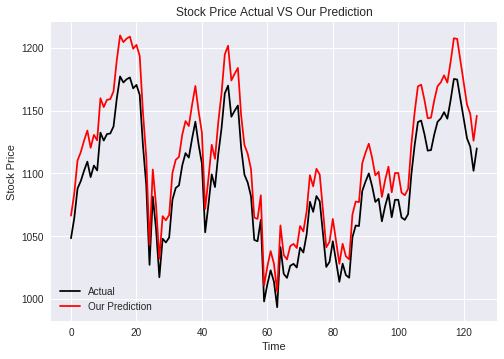

In [0]:
plt.plot(test_data,color='black',label='Actual')
plt.plot(predicted,color='red',label='Our Prediction')
plt.title('Stock Price Actual VS Our Prediction')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

In [0]:
def cost( test_data1, predicted1):
    

    test = (((test_data1- predicted1)**2).sum()/125)**0.5
    return  test


cost( test_data1, predicted1)

18.428883302429405

In [0]:
def accuracy( test_data1, predicted1):
    

    test = (((( predicted1-test_data1))/(test_data1)*125).sum())
    return  test


accuracy( test_data1, predicted1)

253.47837752170798

In [0]:
test_data1=np.reshape(test_data,(125))
predicted1=np.reshape(predicted,(125))
test_data1.shape

(125,)